## Auto MPG Data Set

- https://archive.ics.uci.edu/ml/datasets/Auto+MPG
- The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.
- This is a regression problem where we aim to predict the output of a continuous value, ie fuel efficiency.

#### Steps perfomed in this notebook:
- Dataset Characteristics (Descriptive Analysis)
- Exploratory Data Analysis
- Feature Engineering
    - Log Transformation 
    - Handle Missing Values
    - Exracting the name of the brand
    - Handle Outliers
    - One Hot Encoding
- Regression Models
    - Linear Regression
    - Ridge Regression
    - Lasso Regression
    - ElasticNet
- Prediction


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import norm, skew

## Dataset Characteristics (Descriptive Analysis)

In [2]:
df=pd.read_csv('../Input/auto_mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [5]:
df.shape

(398, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
df[df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


## Exploratory Data Analysis

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [11]:
# Check Covariance
df.cov()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,61.089611,-10.308911,-655.402318,-5505.211745,9.058930,16.741163,3.532185
cylinders,-10.308911,2.893415,168.623214,1290.695575,-2.370842,-2.193499,-0.767477
displacement,-655.402318,168.623214,10872.199152,82368.423240,-156.332976,-142.717137,-50.964989
weight,-5505.211745,1290.695575,82368.423240,717140.990526,-974.899011,-959.946344,-394.639330
acceleration,9.058930,-2.370842,-156.332976,-974.899011,7.604848,2.938105,0.455354
model year,16.741163,-2.193499,-142.717137,-959.946344,2.938105,13.672443,0.535790
origin,3.532185,-0.767477,-50.964989,-394.639330,0.455354,0.535790,0.643292


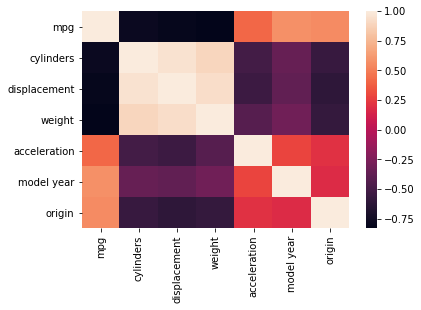

In [12]:
#Check Correlation
sns.heatmap(df.corr())

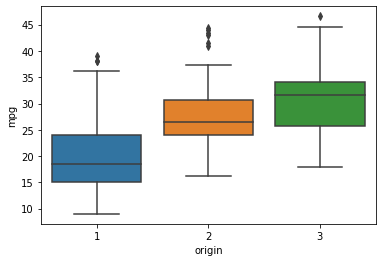

In [13]:
# It is clear that the origin of the car has a good impact on the mileage, with asian cars dominating the league
sns.boxplot(x=df['origin'],y=df['mpg'])

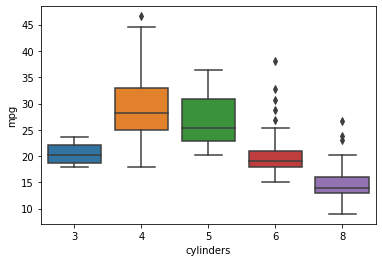

In [14]:
# More the number of cylinder means more power which will burn more fuel and thus the mileage decreases
sns.boxplot(y=df['mpg'],x=df['cylinders'])

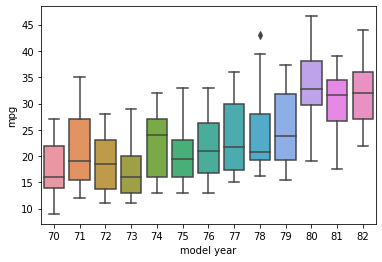

In [15]:
# With the technology being updated with time the performance of the vehicles has increased 
sns.boxplot(x=df['model year'],y=df['mpg'])

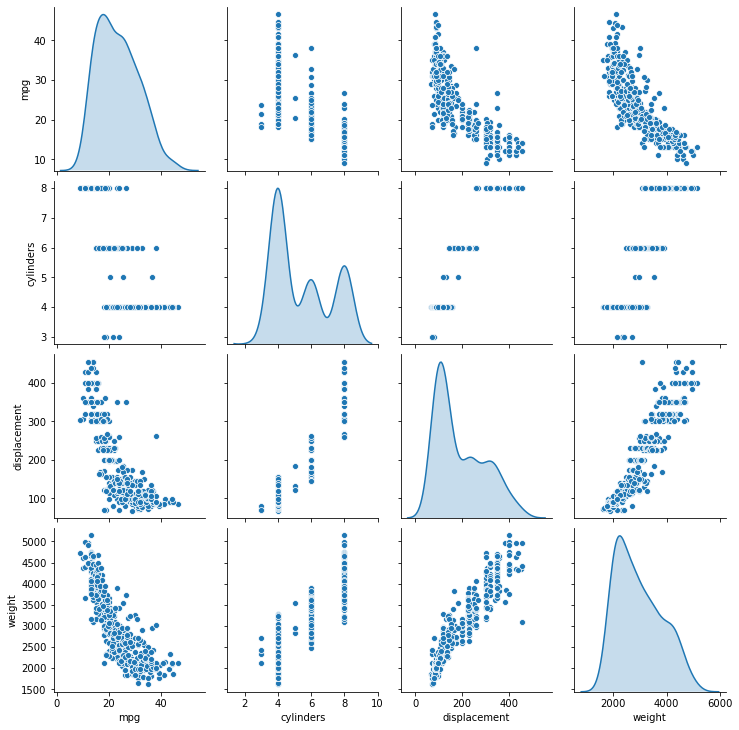

In [16]:
sns.pairplot(df[["mpg", "cylinders", "displacement", "weight"]], diag_kind="kde")

In [17]:
# % distribution of cars among countries
df["origin"].value_counts(normalize=True)

1    0.625628
3    0.198492
2    0.175879
Name: origin, dtype: float64

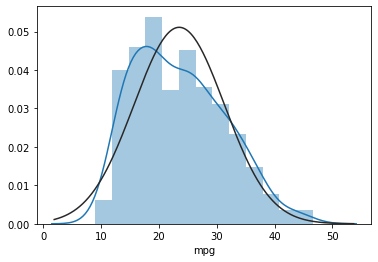

In [18]:
# We can see that mpg has positive skewnesssns
sns.distplot(df['mpg'], fit=norm)

<function matplotlib.pyplot.show(*args, **kw)>

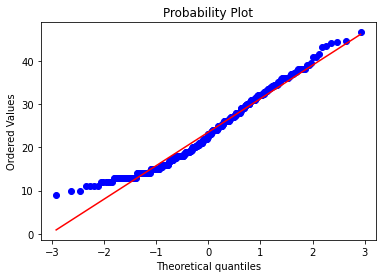

In [19]:
stats.probplot(df["mpg"],plot=plt)
plt.show

## Feature Engineering

### Log Transformation
The log transformation can be used to make highly skewed distributions less skewed

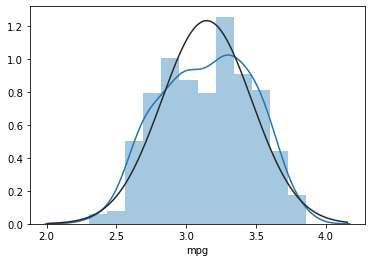

In [20]:
df["mpg"] = np.log1p(df["mpg"])
sns.distplot(df["mpg"], fit=norm)

In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,2.944439,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2.772589,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,2.944439,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,2.833213,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,2.890372,8,302.0,140,3449,10.5,70,1,ford torino


### Handle Missing Values

In [22]:
df['horsepower'][32]=82
df['horsepower'][126]=70
df['horsepower'][330]=45
df['horsepower'][336]=86
df['horsepower'][354]=75
df['horsepower'][374]=82

df["horsepower"] = df["horsepower"].astype(float)

### Exracting the name of the brand

In [23]:
list_brand=[]
for i in range(398):
    list_brand.append(df['car name'][i].split(" ")[0])

df['brand']=list_brand
df['brand'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [24]:
# some of the names as written in short so converitng it to a common name for each

df['brand'] = df['brand'].replace(['volkswagen','vokswagen','vw'],'volkswagen')
df['brand'] = df['brand'].replace('maxda','mazda')
df['brand'] = df['brand'].replace('toyouta','toyota')
df['brand'] = df['brand'].replace('mercedes-benz','mercedes')
df['brand'] = df['brand'].replace('nissan','datsun')
df['brand'] = df['brand'].replace('capri','ford')
df['brand'] = df['brand'].replace(['chevroelt','chevy'],'chevrolet')

df['brand'].value_counts()

ford          52
chevrolet     47
plymouth      31
dodge         28
amc           28
toyota        26
datsun        24
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
peugeot        8
fiat           8
audi           7
chrysler       6
volvo          6
renault        5
opel           4
subaru         4
saab           4
mercedes       3
bmw            2
cadillac       2
triumph        1
hi             1
Name: brand, dtype: int64

In [25]:
df=df.drop(['car name'],axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand
0,2.944439,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,2.772589,8,350.0,165.0,3693,11.5,70,1,buick
2,2.944439,8,318.0,150.0,3436,11.0,70,1,plymouth
3,2.833213,8,304.0,150.0,3433,12.0,70,1,amc
4,2.890372,8,302.0,140.0,3449,10.5,70,1,ford


### Handle Outliers
Outliers are present in Horsepower and Accelaration

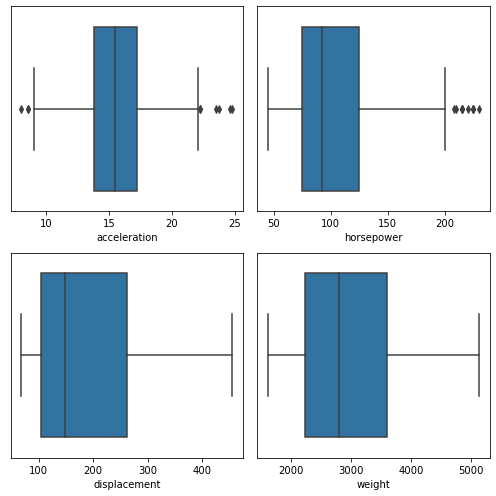

In [26]:
f, axes = plt.subplots(2, 2, figsize=(7, 7))

sns.boxplot(x=df['acceleration'], ax=axes[0, 0])
sns.boxplot(x=df['horsepower'], ax=axes[0, 1])
sns.boxplot(x=df['displacement'], ax=axes[1, 0])
sns.boxplot(x=df['weight'], ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

In [27]:
Q1 = df["horsepower"].quantile(0.25)
Q3 = df["horsepower"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
outlier=df.loc[(df.horsepower < lower_bound) | (df.horsepower > upper_bound)]
    
outlier

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand
6,2.708050,8,454.0,220.0,4354,9.0,70,1,chevrolet
7,2.708050,8,440.0,215.0,4312,8.5,70,1,plymouth
8,2.708050,8,455.0,225.0,4425,10.0,70,1,pontiac
13,2.708050,8,455.0,225.0,3086,10.0,70,1,buick
25,2.397895,8,360.0,215.0,4615,14.0,70,1,ford
27,2.484907,8,318.0,210.0,4382,13.5,70,1,dodge
67,2.484907,8,429.0,208.0,4633,11.0,72,1,mercury
94,2.639057,8,440.0,215.0,4735,11.0,73,1,chrysler
95,2.564949,8,455.0,225.0,4951,11.0,73,1,buick
116,2.833213,8,400.0,230.0,4278,9.5,73,1,pontiac


In [28]:
df = df.loc[(df["horsepower"] > lower_bound) & (df["horsepower"] < upper_bound)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           387 non-null    float64
 1   cylinders     387 non-null    int64  
 2   displacement  387 non-null    float64
 3   horsepower    387 non-null    float64
 4   weight        387 non-null    int64  
 5   acceleration  387 non-null    float64
 6   model year    387 non-null    int64  
 7   origin        387 non-null    int64  
 8   brand         387 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.2+ KB


In [29]:
quantile1, quantile3 = np.percentile(df["acceleration"],[25,75])
iqr= quantile3-quantile1
lower_bound = quantile1 - (1.5 * iqr)
upper_bound = quantile3 + (1.5 * iqr)
outlier=df.loc[(df.acceleration < lower_bound) | (df.acceleration > upper_bound)]
    
outlier

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand
9,2.772589,8,390.0,190.0,3850,8.5,70,1,amc
11,2.708050,8,340.0,160.0,3609,8.0,70,1,plymouth
59,3.178054,4,97.0,54.0,2254,23.5,72,2,volkswagen
299,3.339322,4,141.0,71.0,3190,24.8,79,2,peugeot
326,3.793239,4,90.0,48.0,2335,23.7,80,2,volkswagen
394,3.806662,4,97.0,52.0,2130,24.6,82,2,volkswagen


In [30]:
df=df.loc[(df.acceleration > lower_bound) & (df.acceleration < upper_bound)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           381 non-null    float64
 1   cylinders     381 non-null    int64  
 2   displacement  381 non-null    float64
 3   horsepower    381 non-null    float64
 4   weight        381 non-null    int64  
 5   acceleration  381 non-null    float64
 6   model year    381 non-null    int64  
 7   origin        381 non-null    int64  
 8   brand         381 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 29.8+ KB


### One Hot Encoding 
For "origin", "cylinders" and "model year" because these features have categorical values.

In [31]:
df["origin"] = df["origin"].astype(str)
df["cylinders"] = df["cylinders"].astype(str)
df["model year"] = df["model year"].astype(str)
df.drop(["brand"],axis=1,inplace=True)

df = pd.get_dummies(df,drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 397
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            381 non-null    float64
 1   displacement   381 non-null    float64
 2   horsepower     381 non-null    float64
 3   weight         381 non-null    int64  
 4   acceleration   381 non-null    float64
 5   cylinders_4    381 non-null    uint8  
 6   cylinders_5    381 non-null    uint8  
 7   cylinders_6    381 non-null    uint8  
 8   cylinders_8    381 non-null    uint8  
 9   model year_71  381 non-null    uint8  
 10  model year_72  381 non-null    uint8  
 11  model year_73  381 non-null    uint8  
 12  model year_74  381 non-null    uint8  
 13  model year_75  381 non-null    uint8  
 14  model year_76  381 non-null    uint8  
 15  model year_77  381 non-null    uint8  
 16  model year_78  381 non-null    uint8  
 17  model year_79  381 non-null    uint8  
 18  model year

In [32]:
df.head()

,mpg,displacement,horsepower,weight,acceleration,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model year_71,...,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82,origin_2,origin_3
0,2.944439,307.0,130.0,3504,12.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.772589,350.0,165.0,3693,11.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.944439,318.0,150.0,3436,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.833213,304.0,150.0,3433,12.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.890372,302.0,140.0,3449,10.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Regression Models


In [33]:
y=df['mpg']
X=df.drop(['mpg'],axis=1)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=0)

#### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [36]:
linear_regressor=LinearRegression()
mse=cross_val_score(linear_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-0.027096783070794224


#### Ridge Regression

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [38]:
rg=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(rg,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-0.021368750140875786


In [39]:
ridge = Ridge(random_state=42, max_iter=10000)
alphas = np.logspace(-4,-0.5,30)
tuned_parameters = dict(alpha=alphas)
clf = GridSearchCV(ridge,tuned_parameters,cv=5,scoring="neg_mean_squared_error", refit=True)
clf.fit(X_train,y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
print("Ridge Coef:",clf.best_estimator_.coef_)
ridge = clf.best_estimator_
print("Ridge Best Estimator:",ridge)

Ridge Coef: [-1.39797652e-05 -2.83372658e-03 -1.61472423e-04 -1.03018387e-02
  1.61167714e-01  1.43861300e-01  8.27566317e-02  1.27955492e-01
 -1.02108621e-02 -6.14424407e-02 -9.36842096e-02 -1.57486219e-03
 -2.10710110e-02  2.49424923e-02  7.72246193e-02  6.30129738e-02
  1.66869134e-01  2.51086304e-01  1.97941179e-01  2.24709772e-01
  4.26825298e-02  7.17357055e-02]
Ridge Best Estimator: Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)


In [40]:
y_pred_ridge = clf.predict(X_test)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
print("Ridge MSE:",mse_ridge)

Ridge MSE: 0.010680162575796933


#### Lasso Regression

In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [42]:
ls=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(ls,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.023486404260267442


In [43]:
lasso = Lasso(random_state=42, max_iter=10000)
alphas = np.logspace(-4,-0.5,30)
tuned_parameters = dict(alpha=alphas)
clf = GridSearchCV(lasso,tuned_parameters,cv=5,scoring="neg_mean_squared_error", refit=True)
clf.fit(X_train,y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
print("Lasso Coef:",clf.best_estimator_.coef_)
lasso = clf.best_estimator_
print("Lasso Best Estimator:",lasso)
print("Put Zero for redundat features:")

Lasso Coef: [-6.52432237e-06 -2.79941060e-03 -1.62360040e-04 -9.97311244e-03
  7.99770674e-02  3.95590961e-02 -0.00000000e+00  4.20161078e-02
 -6.49813516e-03 -5.68442065e-02 -9.37568740e-02 -0.00000000e+00
 -1.76536752e-02  2.22186086e-02  7.41492940e-02  6.17252368e-02
  1.64741137e-01  2.52695152e-01  1.97301000e-01  2.23216586e-01
  3.98820676e-02  6.71240856e-02]
Lasso Best Estimator: Lasso(alpha=0.0003039195382313198, max_iter=10000, random_state=42)
Put Zero for redundat features:


In [44]:
y_pred_lasso = clf.predict(X_test)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
print("Lasso MSE:",mse_lasso)

Lasso MSE: 0.011439386359833967


#### ElasticNet

In [45]:
from sklearn.linear_model import ElasticNet

In [46]:
parameters = dict(alpha=alphas,l1_ratio=np.arange(0.0,1,0.05))
eNet = ElasticNet(random_state=42, max_iter=10000)
clf = GridSearchCV(eNet,tuned_parameters,cv=5,scoring="neg_mean_squared_error", refit=True)
clf.fit(X_train,y_train)
print("Lasso Coef:",clf.best_estimator_.coef_)
eNet = clf.best_estimator_
print("Lasso Best Estimator:",eNet)

Lasso Coef: [ 0.00000000e+00 -2.80903155e-03 -1.62233062e-04 -1.00044814e-02
  8.09555806e-02  4.48713531e-02 -0.00000000e+00  4.20138608e-02
 -7.86140499e-03 -5.82187368e-02 -9.47409861e-02 -0.00000000e+00
 -1.89138072e-02  2.17216970e-02  7.35866417e-02  6.10105617e-02
  1.63890301e-01  2.50944394e-01  1.96142897e-01  2.21986291e-01
  3.99892296e-02  6.75243303e-02]
Lasso Best Estimator: ElasticNet(alpha=0.0005298316906283707, max_iter=10000, random_state=42)


In [47]:
y_pred_eNet = clf.predict(X_test)
mse_eNet = mean_squared_error(y_test,y_pred_eNet)
print("Lasso MSE:",mse_eNet)

Lasso MSE: 0.011417956926638358


## Prediction

In [48]:
linear_regressor.fit(X_train,y_train)
y_pred=linear_regressor.predict(X_test)
linear_regressor.score(X_test,y_test)

0.8983339556435118

In [49]:
prediction_ridge=ridge_regressor.predict(X_test)
prediction_lasso=lasso_regressor.predict(X_test)

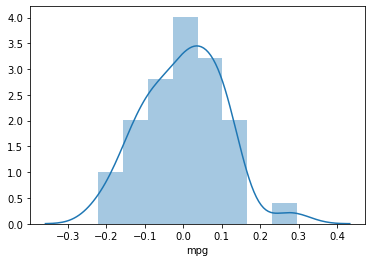

In [50]:
sns.distplot(y_test-prediction_ridge)

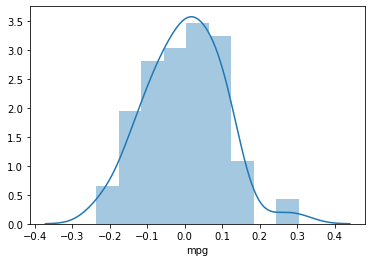

In [51]:
sns.distplot(y_test-prediction_lasso)